In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [8]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.16, 1.18, 1.22, 1.27, 1.4 , 1.53, 1.71, 1.95, 2.25, 2.66, 3.2 ,
       3.89, 4.78, 5.9 , 7.3 , 8.43])

array([7776.35, 4549.06, 2970.13, 1822.86,  964.37,  622.63,  395.75,
        255.07,  166.08,  106.83,   68.94,   44.87,   29.2 ,   19.05,
         12.49,    9.76])

array([1.08, 1.09, 1.11, 1.14, 1.19, 1.25, 1.31, 1.39, 1.5 , 1.63, 1.79,
       1.99, 2.24, 2.54, 2.91, 3.34, 3.86, 4.47, 5.16, 5.97, 6.9 , 8.74])

array([6.63683e+03, 3.20595e+03, 1.88549e+03, 1.13662e+03, 6.69790e+02,
       4.25070e+02, 2.72000e+02, 1.70660e+02, 1.05880e+02, 6.72200e+01,
       4.29400e+01, 2.74600e+01, 1.75900e+01, 1.12000e+01, 7.19000e+00,
       4.64000e+00, 2.98000e+00, 1.93000e+00, 1.25000e+00, 8.10000e-01,
       5.20000e-01, 2.80000e-01])

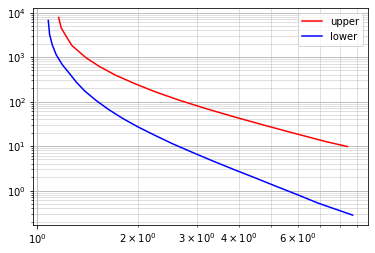

In [9]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[2.24895, -1.42565, -0.18309, 0.10299, 0.01932, -0.08768]

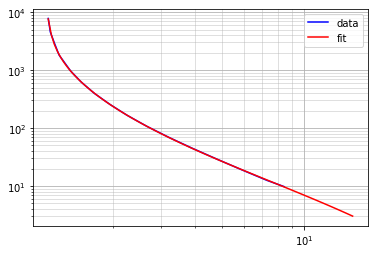

In [32]:
# Curve fitting upper

In = 1.1
order=5
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[1.37956, -1.90721, -0.18381, -0.47497, -0.12317, 0.71575, 0.04083, -0.31465]

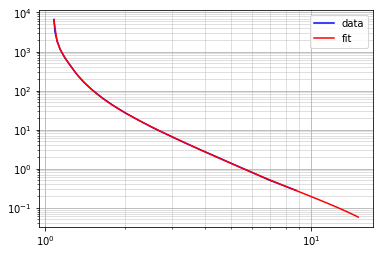

In [30]:
# Curve fitting lower

In=1.03
order=7
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))